**Alina Florencia Karuniawati - PYTN-KS10-001**


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.diagnostic import normal_ad

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Overview Data Bank

In [2]:
df = pd.read_csv('bank.csv', sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Check Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Kolom-kolom yang merupakan data numerical, yaitu age, balance, day, duration, campaign, pdays, previous <br>
Kolom-kolom yang merupakan data categorical, yaitu job, marital, education, default, balance, housing, loan, contact, month, poutcome, dan y

## Check Missing Value

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Berdasarkan pengecekan di atas tidak terdapat missing values.

## Check Duplicated Data

In [5]:
df.duplicated().sum()

0

Berdasarkan pengecekan di atas tidak terdapat data yang duplikat

## Data Visualization

### Distribution of the Age of Clients

$H_0$ : **`The Age of the clients are normally distributed`** <br>
$H_1$ : **`The Age of the clients are not normally distributed`** <br>

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


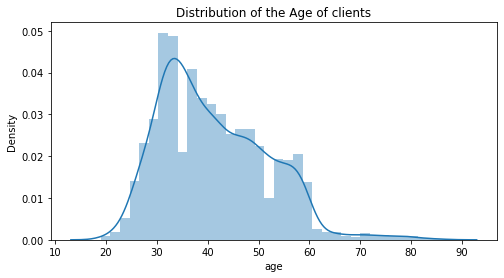

Age are not normally distributed


In [6]:
p_value = normal_ad(df['age'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)


plt.subplots(figsize=(8, 4))
plt.title('Distribution of the Age of clients', fontsize=12)
sns.distplot(df['age'])
plt.show()


if p_value < 0.05:
    print('Age are not normally distributed')
else:
    print('Age normally distributed')

Berdasarkan Anderson Darling Test, dapat dikatakan bahwa distribusi umur dari clients tidak normal. Dari visualisasi di atas dapat dilihat bahwa distribusi dari umur klien tergolong right skewed.

### Number of Successful and Unsuccessful Phone Calls based on Client's Occupation

In [7]:
dfgr1 = df[['job','y']].groupby(['job','y']).agg({'job':'count'})
dfgr1

job
job           y       
admin.        no   420
              yes   58
blue-collar   no   877
              yes   69
entrepreneur  no   153
              yes   15
housemaid     no    98
              yes   14
management    no   838
              yes  131
retired       no   176
              yes   54
self-employed no   163
              yes   20
services      no   379
              yes   38
student       no    65
              yes   19
technician    no   685
              yes   83
unemployed    no   115
              yes   13
unknown       no    31
              yes    7

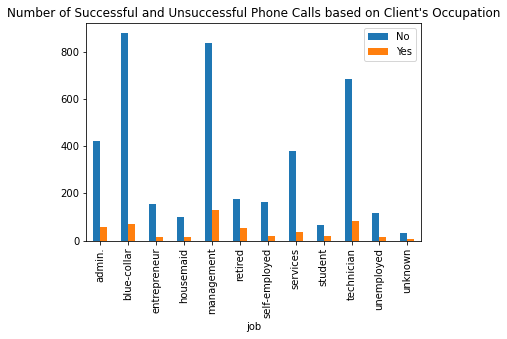

In [8]:
ax = dfgr1.unstack(level=1).plot(kind='bar')
plt.legend(['No','Yes'])
plt.title("Number of Successful and Unsuccessful Phone Calls based on Client's Occupation")
plt.show()

Berdasarkan visualisasi di atas jumlah phone call yang berhasil paling banyak pada klien yang bekerja di bidang management. Sementara itu, untuk jumlah phone call yang ditolak paling banyak pada klien yang bekerja sebagai blue-collar.

### Top 5 Month with the Largest Number of Phone Calling

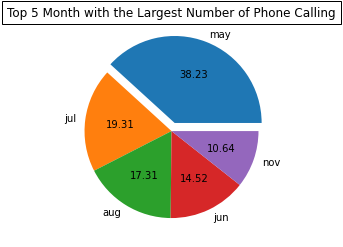

In [9]:
explode=[0.1,0,0,0,0]
df.month.value_counts().head(5).plot(kind='pie', autopct='%.2f', explode = explode)
plt.ylabel('')
plt.title('Top 5 Month with the Largest Number of Phone Calling', bbox={'facecolor':'1', 'pad':5})
plt.show()

Klien paling banyak terakhir dihubungi pada bulan mei dengan persentase sebesar 38.23%

## Drop Unnecessary Column

Kolom day dan month tidak digunakan dalam modelling, sehingga akan di remove

In [10]:
df1 = df.drop(['day','month'], axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


## Label Encoding

Kolom-kolom yang merupakan data categorical akan diubah menjadi data numerical dengan menggunakan Label Encoder sklearn

In [11]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
df1['job_dummy']= label_encoder.fit_transform(df1['job'])
df1['marital_dummy']= label_encoder.fit_transform(df1['marital'])
df1['education_dummy']= label_encoder.fit_transform(df1['education'])
df1['default_dummy']= label_encoder.fit_transform(df1['default'])
df1['housing_dummy']= label_encoder.fit_transform(df1['housing'])
df1['loan_dummy']= label_encoder.fit_transform(df1['loan'])
df1['contact_dummy']= label_encoder.fit_transform(df1['contact'])
df1['poutcome_dummy']= label_encoder.fit_transform(df1['poutcome'])
df1['y_dummy']= label_encoder.fit_transform(df1['y'])
df1

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,y,job_dummy,marital_dummy,education_dummy,default_dummy,housing_dummy,loan_dummy,contact_dummy,poutcome_dummy,y_dummy
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,...,no,10,1,0,0,0,0,0,3,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,...,no,7,1,1,0,1,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,...,no,4,2,2,0,1,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,...,no,4,1,2,0,1,1,2,3,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,...,no,1,1,1,0,1,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,...,no,7,1,1,0,1,0,0,3,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,...,no,6,1,2,1,1,1,2,3,0
4518,57,technician,married,secondary,no,295,no,no,cellular,151,...,no,9,1,1,0,0,0,0,3,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,...,no,1,1,1,0,0,0,0,1,0


## Split Data

Data yang akan digunakan untuk training adalah sebesar 75%, sedangkan 25% sisanya digunakan untuk testing

In [13]:
train, test = train_test_split(df1, test_size=0.25, random_state=11)
train_index = train.index
test_index = test.index

In [14]:
X = train[['age','job_dummy','marital_dummy','education_dummy','default_dummy','balance','housing_dummy','loan_dummy','contact_dummy','duration','campaign','pdays','previous','poutcome_dummy']]
y = train[['y_dummy']]

In [15]:
X_test = test[['age','job_dummy','marital_dummy','education_dummy','default_dummy','balance','housing_dummy','loan_dummy','contact_dummy','duration','campaign','pdays','previous','poutcome_dummy']]

In [16]:
y_test = test[['y_dummy']]

## Scale Data

Kita akan melakukan proses standardization terhadap data train dan testing agar mean tiap kolom menjadi sama dengan nol dan std tiap kolom menjadi satu

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [18]:
X_test = scaler.transform(X_test)

## Logistic Regression

In [19]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [20]:
model.fit(X_train,y)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
print(model.intercept_)
print(model.coef_)

[-2.58348233]
[[ 0.03121824  0.01296174 -0.00445469  0.08860458  0.060628    0.0556361
  -0.38114641 -0.29093786 -0.4965045   1.01751816 -0.27692107  0.23814449
   0.22355791  0.17381454]]


### Evaluate the Model

In [22]:
model.predict_proba(X_train)

array([[0.98634766, 0.01365234],
       [0.97028276, 0.02971724],
       [0.61434232, 0.38565768],
       ...,
       [0.8835441 , 0.1164559 ],
       [0.75132531, 0.24867469],
       [0.64349525, 0.35650475]])

In [23]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
model.score(X_train,y)

0.8867256637168142

Akurasi dari model Logistic Regression untuk data ini adalah sebesar 88,67%.

### Confusion Matrix

In [25]:
confusion_matrix(y, model.predict(X_train))

array([[2929,   59],
       [ 325,   77]], dtype=int64)

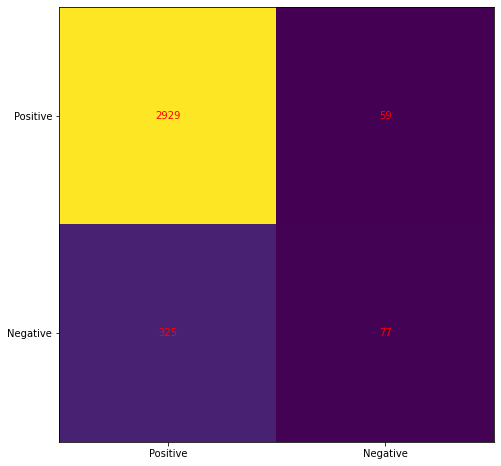

In [26]:
cm = confusion_matrix(y, model.predict(X_train))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. Artinya, model ini masih dapat diimprove untuk menghasilkan prediksi yang lebih akurat.

### Classification Report

In [27]:
print(classification_report(y,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2988
           1       0.57      0.19      0.29       402

    accuracy                           0.89      3390
   macro avg       0.73      0.59      0.61      3390
weighted avg       0.86      0.89      0.86      3390



### Predict Testing Data

In [28]:
y_pred = model.predict(X_test)

In [29]:
model.score(X_test, y_test)

0.8983200707338639

### Comparison between Testing Data and Training Data

In [30]:
compared = pd.DataFrame({'Keterangan':['Training Data','Testing Data'],'Accuracy':[model.score(X_train,y), model.score(X_test, y_test)]})
compared

,Keterangan,Accuracy
0,Training Data,0.886726
1,Testing Data,0.898320


Dari perbandingan akurasi dapat dilihat bahwa model ini termasuk overfitting karena testing data memiliki nilai akurasi yang lebih tinggi daripada training data

## K-Nearest Neighbors

### k = 5

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y)

KNeighborsClassifier()

### Evaluate the Model

In [32]:
y_pred1 = knn.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8947833775419982


### k = 7

In [34]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train, y)

KNeighborsClassifier(n_neighbors=7)

### Evaluate the Model

In [35]:
y_pred11 = knn1.predict(X_test)
y_pred11

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred11))

Accuracy: 0.900972590627763


### Improve the Model

In [37]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test['y_dummy'].to_list()))

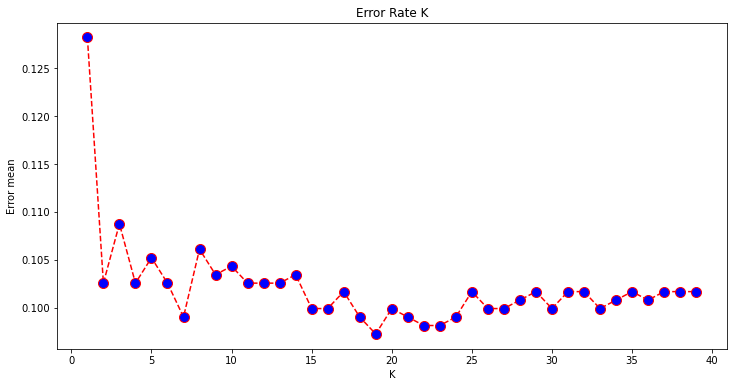

In [38]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')
plt.show()

Berdasarkan plot di atas terlihat bahwa error terkecil pada saat K = 19

### k = 19

In [39]:
knn2 = KNeighborsClassifier(n_neighbors=19)
knn2.fit(X_train, y)

KNeighborsClassifier(n_neighbors=19)

### Evaluate the Model

In [40]:
y_pred111 = knn2.predict(X_test)
y_pred111

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred111))

Accuracy: 0.9027409372236959


Akurasi dari model KNN dengan nilai k sebesar 19 untuk data ini adalah sebesar 90,27%.

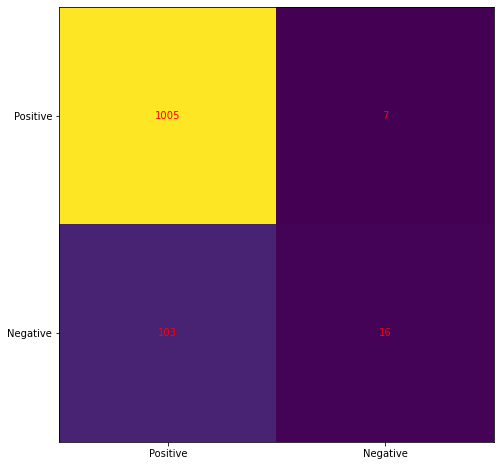

In [42]:
cm = confusion_matrix(y_test, y_pred111)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. Artinya, model ini masih dapat diimprove untuk menghasilkan prediksi yang lebih akurat.

## Support Vector Machine

In [43]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y)

SVC(kernel='linear')

### Evaluate the Model

In [44]:
y_pred3 =clf.predict(X_test)

In [45]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8947833775419982


Akurasi untuk model SVM pada data ini adalah sebesar 89,48%

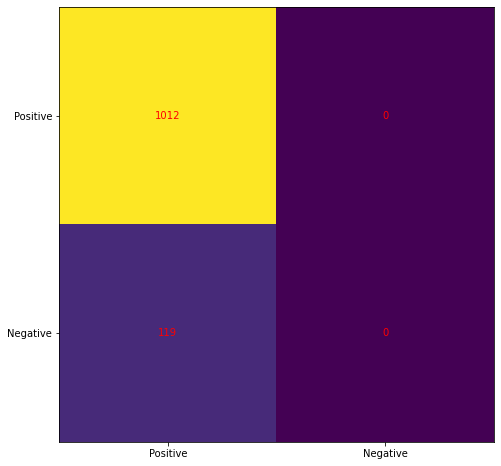

In [46]:
cm = confusion_matrix(y_test, y_pred3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. Artinya, model ini masih dapat diimprove untuk menghasilkan prediksi yang lebih akurat.

## Naive Bayes

In [47]:
gnb = GaussianNB()
gnb.fit(X_train,y)

GaussianNB()

### Evaluate the Model

In [48]:
y_pred4 =gnb.predict(X_test)

In [49]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.830238726790451


Akurasi untuk model naive bayes pada data ini adalah sebesar 83.02%

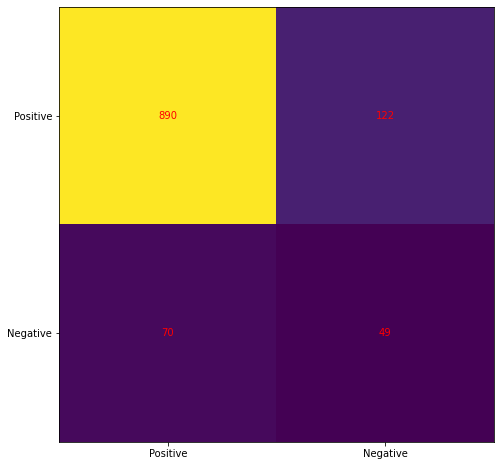

In [50]:
cm = confusion_matrix(y_test, y_pred4)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. Artinya, model ini masih dapat diimprove untuk menghasilkan prediksi yang lebih akurat.

## Decision Tree

In [51]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y)

### Evaluate the Model

In [52]:
y_pred5 =dt.predict(X_test)

In [53]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.847922192749779


### Improve the Model

Kita melakukan improve dengan menggunakan max_depth sebesar 5 untuk mendapatkan akurasi yang lebih tinggi

In [54]:
dt1 = DecisionTreeClassifier(criterion="entropy",max_depth = 5)
dt1 = dt1.fit(X_train, y)

In [55]:
y_pred6 =dt1.predict(X_test)

In [56]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.9018567639257294


Akurasi model Decision Tree dengan max dept sebesar 5 adalah 90,18%

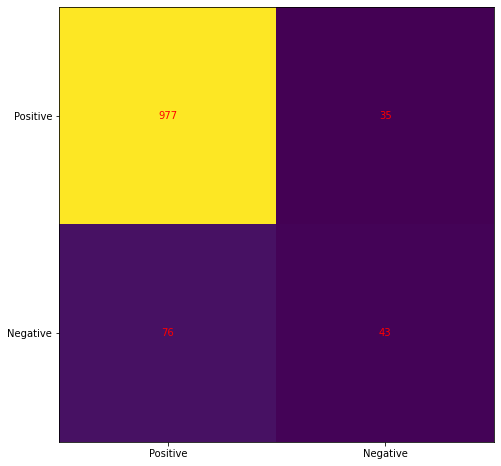

In [57]:
cm = confusion_matrix(y_test, y_pred6)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive lebih banyak dari False Positive. Akan tetapi untuk True Negative masih lebih sedikit daripada False Negative. Artinya, model ini masih dapat diimprove untuk menghasilkan prediksi yang lebih akurat.

## Random Forest

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train,y)
y_pred7 = rf.predict(X_test)

In [59]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred7))

Accuracy: 0.896551724137931


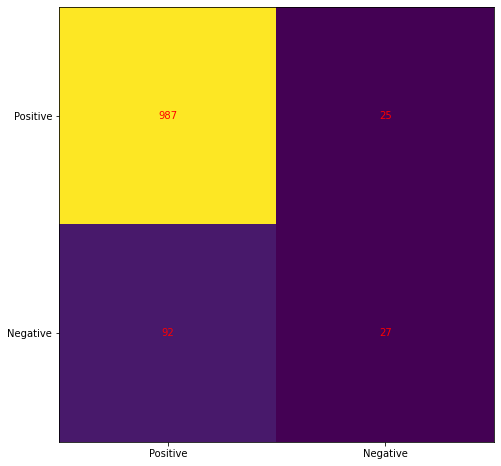

In [60]:
cm = confusion_matrix(y_test, y_pred7)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

# Comparison between the Model

In [61]:
compared_model = pd.DataFrame({'Keterangan':['Logistic Regression','KNN (k=19)', 'SVM',
                                            'Decision Tree','Naive Bayes','Random Forest'],
                               'Accuracy':[model.score(X_test, y_test),metrics.accuracy_score(y_test, y_pred111),
                                          metrics.accuracy_score(y_test, y_pred3),metrics.accuracy_score(y_test, y_pred6),
                                          metrics.accuracy_score(y_test, y_pred4),metrics.accuracy_score(y_test, y_pred7)]})
compared_model

,Keterangan,Accuracy
0,Logistic Regression,0.898320
1,KNN (k=19),0.902741
2,SVM,0.894783
3,Decision Tree,0.901857
4,Naive Bayes,0.830239
5,Random Forest,0.896552


Model terbaik adalah KNN dengan nilai k sebesar 19 dan memiliki akurasi sebesar 90,27%. Oleh karena itu selanjutnya kita akan memodelkan data banking full additional menggunakan KNN dengan k sebesar 19

## Bank Additional Full Data

In [62]:
df_new = pd.read_csv('bank-additional-full.csv', sep=';')
df_new

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Check Missing Values

In [63]:
df_new.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

tidak ditemukan missing value

### Check Duplicated Data

In [64]:
df_new.duplicated().sum()

12

terdapat 12 data yang duplikat sehingga akan diremove

In [65]:
df_new.drop_duplicates(subset=df_new.columns, keep='first', inplace=True)

In [66]:
df_new.shape

(41176, 21)

Data duplikat telah berhasil dibuang

### Change Categorical Data into Numerical Data

In [67]:
df_new['job_dummy']= label_encoder.fit_transform(df_new['job'])
df_new['marital_dummy']= label_encoder.fit_transform(df_new['marital'])
df_new['education_dummy']= label_encoder.fit_transform(df_new['education'])
df_new['default_dummy']= label_encoder.fit_transform(df_new['default'])
df_new['housing_dummy']= label_encoder.fit_transform(df_new['housing'])
df_new['loan_dummy']= label_encoder.fit_transform(df_new['loan'])
df_new['contact_dummy']= label_encoder.fit_transform(df_new['contact'])
df_new['poutcome_dummy']= label_encoder.fit_transform(df_new['poutcome'])
df_new['y_dummy']= label_encoder.fit_transform(df_new['y'])
df_new

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,job_dummy,marital_dummy,education_dummy,default_dummy,housing_dummy,loan_dummy,contact_dummy,poutcome_dummy,y_dummy
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,3,1,0,0,0,0,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,no,7,1,3,1,0,0,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,7,1,3,0,2,0,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,0,1,1,0,0,0,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,7,1,3,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,yes,5,1,5,0,2,0,0,1,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,no,1,1,5,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,no,5,1,6,0,2,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,yes,9,1,5,0,0,0,0,1,1


### Split Data

In [68]:
train1, test1 = train_test_split(df_new, test_size=0.25, random_state=11)
train_index1 = train.index
test_index1 = test.index

In [69]:
X1 = train1[['age','job_dummy','marital_dummy','education_dummy','default_dummy','cons.price.idx','housing_dummy','loan_dummy','contact_dummy','duration','campaign','pdays','previous','poutcome_dummy']]
y1 = train1[['y_dummy']]

In [70]:
X_test1 = test1[['age','job_dummy','marital_dummy','education_dummy','default_dummy','cons.price.idx','housing_dummy','loan_dummy','contact_dummy','duration','campaign','pdays','previous','poutcome_dummy']]

In [71]:
y_test1 = test1[['y_dummy']]

### Scale Data

In [72]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X1)

In [73]:
X_test1 = scaler.transform(X_test1)

### KNN with k =19

In [74]:
knn23 = KNeighborsClassifier(n_neighbors=19)
knn23.fit(X_train1, y1)

KNeighborsClassifier(n_neighbors=19)

### Evaluate the Model

In [75]:
y_pred1111 = knn23.predict(X_test1)
y_pred1111

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
print('Accuracy:', metrics.accuracy_score(y_test1, y_pred1111))

Accuracy: 0.9028560326403731


Akurasi model KNN dengan k=19 untuk data Bank Additional Full bernilai sebesar 90.28%

# Conclusion

Model KNN dengan k=19 adalah model yang paling sesuai daripada model-model lain karena terbukti memiliki akurasi yang paling tinggi (90,27%). Selain itu, apabila dicoba untuk memodelkan data bank additional full data juga menghasilkan akurasi yang kurang lebih sama yaitu sebesar 90,28%.